# ECCO analyses in Julia

- part 1 : the ocean state history for the 1980-2023 period is depicted in this notebook using the [OCCA2HR1](https://doi.org/10.21203/rs.3.rs-3979671/v1) ocean state estimate. The displayed quantities were calculated via the [Climatology.jl](https://github.com/JuliaOcean/Climatology.jl#readme) Julia package. Here the precomputed diagnostics are downloaded and plotted, again using `Climatology.jl`. The same variables can also be viewed for the [ECCO4](https://doi.org/10.5194/gmd-8-3071-2015) ocean state estimates.
- part 2 : let's look at some of the internals. Specifically, the `MeshArrays.jl` and `MITgcm.jl` packages that were used to compute diagnostics from `MITgcm` output on the native model grid, and read model output to start with.

**References :**

- Gaël Forget. Energy Imbalance in the Sunlit Ocean Layer, 11 April 2024, PREPRINT (under review), https://doi.org/10.21203/rs.3.rs-3979671/v1
- Forget, G., Campin, J.-M., Heimbach, P., Hill, C. N., Ponte, R. M., and Wunsch, C.: ECCO version 4: an integrated framework for non-linear inverse modeling and global ocean state estimation, Geosci. Model Dev., 8, 3071–3104, https://doi.org/10.5194/gmd-8-3071-2015, 2015

In [12]:
#Let's start a temporary environment for this notebook, and add julia packages that we will use
if !isdefined(Main,:Climatology)
    using Pkg; Pkg.activate(temp=true)
    Pkg.add.(["Climatology", "MeshArrays", "MITgcm","NetCDF", "CairoMakie"])
end            
using Climatology, MeshArrays, MITgcm, NetCDF, CairoMakie

In [2]:
#download the data the first time around, then just return the path
path0=Climatology.downloads.datadep"OCCA2HR1-stdiags";

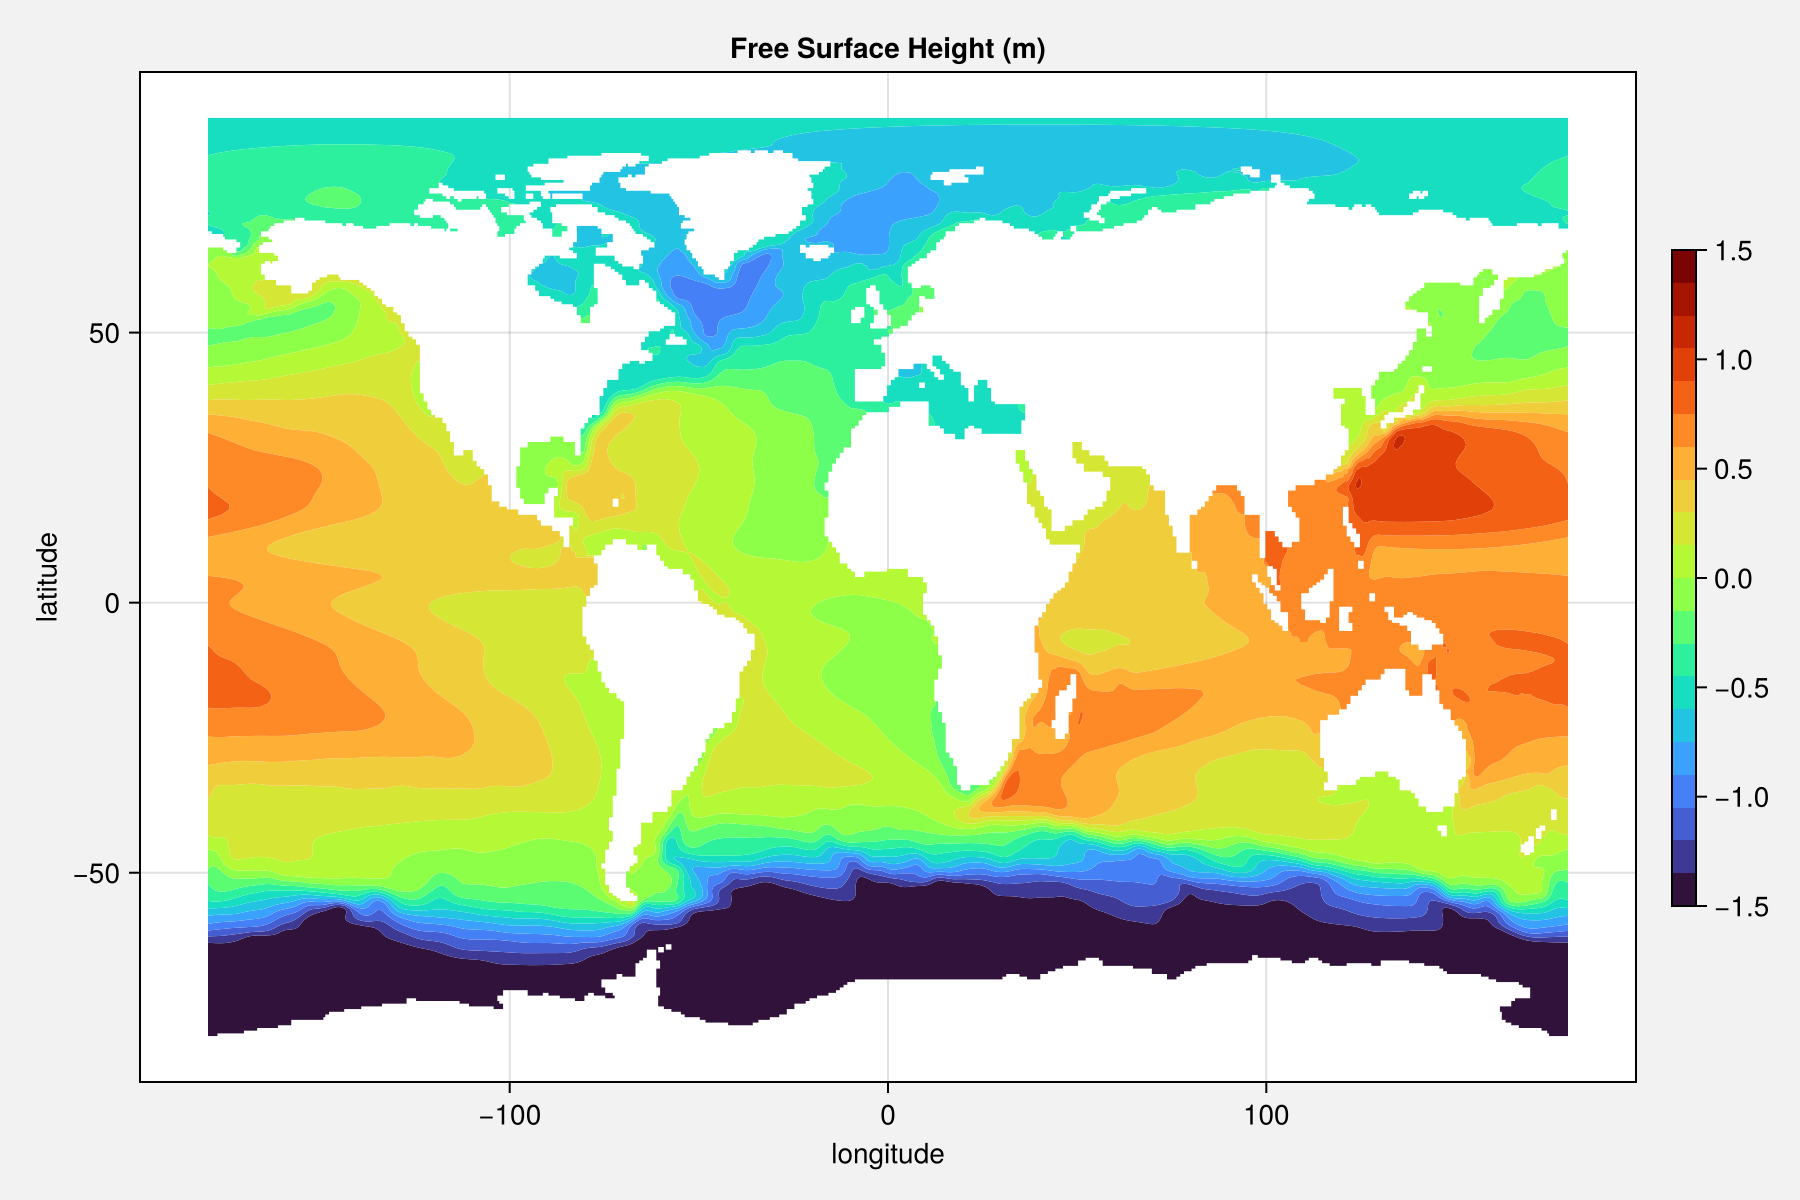

In [8]:
#plot a pre-computed diagnostic, here the time mean map of the model's free  surface height
Pa=ECCO_procs.parameters()
Op=(plot_type=:ECCO_map,nammap="Free Surface Height (m)",P=Pa,statmap="mean",timemap=1)
diag=ECCOdiag(path=path0,options=Op)
plot(diag)

In [9]:
#Let's look at the list of precomputed diagnostics
sol="OCCA2HR1"
year0,year1=ECCO_procs.years_min_max(sol)
readdir(path0)

19-element Vector{String}:
 "BSF_clim"
 "ECCO_transport_lines"
 "MHT"
 "MXLDEPTH_clim"
 "MXLDEPTH_zonmean2d"
 "SALT_clim"
 "SALT_glo2d"
 "SALT_glo3d"
 "SALT_zonmean"
 "SIarea_clim"
 "SIarea_zonmean2d"
 "SSH_clim"
 "SSH_zonmean2d"
 "THETA_clim"
 "THETA_glo2d"
 "THETA_glo3d"
 "THETA_zonmean"
 "overturn"
 "trsp"

In [10]:
#long name for precomputed climatolgy maps
P.clim_longname

16-element Vector{String}:
 "Horizontal Streamfunction (m3/s)"
 "Mixed Layer Depth (m)"
 "Salinity (psu) at level 01"
 "Salinity (psu) at level 10"
 "Salinity (psu) at level 20"
 "Salinity (psu) at level 29"
 "Salinity (psu) at level 38"
 "Salinity (psu) at level 44"
 "Ice Concentration (0 to 1)"
 "Free Surface Height (m)"
 "Potential Temperature (degree C) at level 01"
 "Potential Temperature (degree C) at level 10"
 "Potential Temperature (degree C) at level 20"
 "Potential Temperature (degree C) at level 29"
 "Potential Temperature (degree C) at level 38"
 "Potential Temperature (degree C) at level 44"

In [11]:
#download the variables from the public archive
get_ecco_variable_if_needed("ETAN")
path=joinpath(ScratchSpaces.ECCO,"ETAN/ETAN")
γ=GridSpec("LatLonCap",MeshArrays.GRID_LLC90)
tmp=read_nctiles(path,"ETAN",γ,I=(:,:,1))

5×1 MeshArrays.gcmarray{Float64, 2, Matrix{Float64}}:
 [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN NaN … NaN NaN]
 [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN NaN … NaN NaN]
 [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN NaN … NaN NaN]
 [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN NaN … NaN NaN]
 [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN NaN … NaN NaN]